In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv('Pumpkin_Seeds_Dataset.csv')
X = df.drop('Class', axis=1)
y = df['Class']

In [53]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [55]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

--------------------

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [57]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=200, verbose=False, random_seed=42)
model.fit(X_train, y_train)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

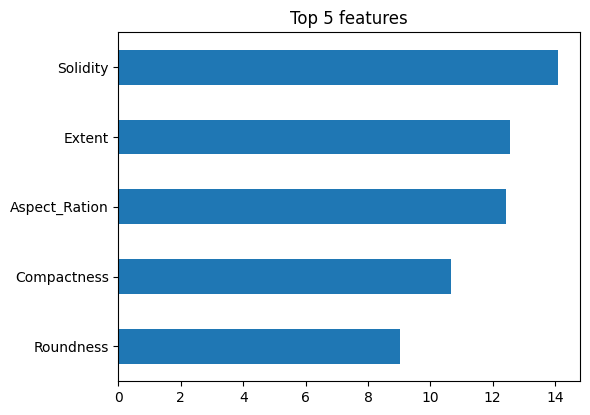

In [60]:
imp = model.get_feature_importance()
feat = pd.Series(imp, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(6, 0.45*5 + 2))
feat.head(5).iloc[::-1].plot(kind="barh")
plt.title(f"Top {5} features")
plt.tight_layout()
plt.savefig("feature_importance_top.png", dpi=200)
plt.show()

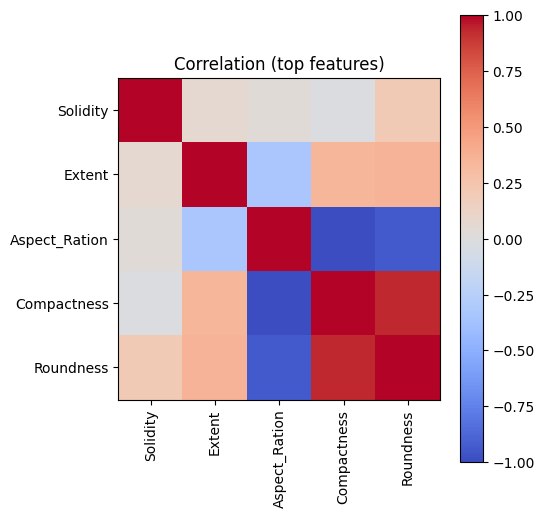

In [62]:
top_cols = feat.head(5).index
corr = df[top_cols].corr()
plt.figure(figsize=(0.7*5 + 2, 0.7*5 + 2))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(top_cols)), top_cols, rotation=90)
plt.yticks(range(len(top_cols)), top_cols)
plt.title("Correlation (top features)")
plt.tight_layout()
plt.savefig("correlation_top_features.png", dpi=200)
plt.show()

-----------------------

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_text = df['Class'].astype(str).values
y = le.fit_transform(y_text)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [65]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(
iterations=500,
depth=6,
learning_rate=0.1,
loss_function='Logloss',
verbose=False,
random_state=42,
)
cb.fit(X_train, y_train)

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_cb = cb.predict(X_test)
acc_cb = accuracy_score(y_test, y_pred_cb)
print("CatBoost accuracy:", acc_cb)
print("CatBoost confusion matrix:\n", confusion_matrix(y_test, y_pred_cb))
print("CatBoost classification report:\n", classification_report(y_test, y_pred_cb, target_names=le.classes_))

CatBoost accuracy: 0.876
CatBoost confusion matrix:
 [[237  23]
 [ 39 201]]
CatBoost classification report:
                precision    recall  f1-score   support

   Çerçevelik       0.86      0.91      0.88       260
Ürgüp Sivrisi       0.90      0.84      0.87       240

     accuracy                           0.88       500
    macro avg       0.88      0.87      0.88       500
 weighted avg       0.88      0.88      0.88       500



--------------------

In [67]:
df = pd.read_csv('Pumpkin_Seeds_Dataset.csv')
X = df.drop(columns=['Class']).values
y = df['Class'].values

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [70]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='sgd', max_iter=5000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=5000, random_state=42,
              solver='sgd')

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.87
[[231  29]
 [ 36 204]]
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.89      0.88       260
Ürgüp Sivrisi       0.88      0.85      0.86       240

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



------------------

In [76]:
le = LabelEncoder()
y_text = df['Class'].astype(str).values
y = le.fit_transform(y_text)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes": [(32,), (64,), (32,16)],
    "learning_rate_init": [0.001, 0.003, 0.01],
    "alpha": [1e-5, 1e-4, 1e-3]
}

In [79]:
from sklearn.model_selection import StratifiedKFold

clf = GridSearchCV(
    MLPClassifier(
        solver='adam',
        activation='relu',
        max_iter=500,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=42
    ),
    param_grid=param_grid,
    scoring="accuracy",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

In [80]:
clf.fit(X_train, y_train)
best = clf.best_estimator_
print("Best params:", clf.best_params_)
print("CV best score:", clf.best_score_)

Best params: {'alpha': 1e-05, 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.01}
CV best score: 0.889


In [81]:
y_pred = best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.872


------------------

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [95]:
mlp = MLPClassifier(
        hidden_layer_sizes=(32,16),
        solver='adam',
        learning_rate_init=0.001,
        alpha=3e-3,
        early_stopping=True,
        n_iter_no_change=20,
        max_iter=500,
        random_state=42
    )

In [96]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    mlp, X_train, y_train,
    cv=cv,
    scoring=["accuracy","f1_macro"],
    n_jobs=-1,
    return_train_score=False
)

In [ ]:
print(f"CV accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
print(f"CV f1_macro: {scores['test_f1_macro'].mean():.4f} ± {scores['test_f1_macro'].std():.4f}")

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

CV accuracy: 0.8800 ± 0.0144
CV f1_macro: 0.8797 ± 0.0144
Test accuracy: 0.842
[[214  46]
 [ 33 207]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       260
           1       0.82      0.86      0.84       240

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



------------------

Попробуем понять, почему catboost и "улучшенный" mlp дает примерно один и тот же accuracy:

- CatBoost очень хорош именно на табличках
Ordered boosting, симметричные деревья, shrinkage и прочие чепуха устойчиво ловит неглубокие взаимодействия и монотонности и не требуют масштабирования признаков. Обычный mlp без "тюна" не сможет выдать такие же результаты.
- MLP раскрывается на больших объёмах и сложных паттернах, а у нас небольшой датасет. «Сильные» модели быстро упираются в variance/overfit-барьер, поэтому аккуратно регуляризованный MLP и бустинг дают схожий результат.

Вообщем, если датасет - числовая табличка, то оптимальным решением будет использовать CatBoost, но если очень надо, то можно попробовать аккуратно написать нейронную сеть и получить меньшую ошибку. 